In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
pd.set_option("display.max_columns",55)

In [4]:
# Base de données
data=pd.read_csv("loans_data.csv")
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [5]:
# Supression des variables où il y'a au moins 80% de valeur nulles
valeurs_na=data.isnull().mean()
valeurs_na[valeurs_na>0.8]


,0
annual_income_joint,0.8505
verification_income_joint,0.8545
debt_to_income_joint,0.8505


In [6]:
data2=data.drop(columns=["debt_to_income_joint","verification_income_joint","annual_income_joint"])
data2.head()


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [7]:
np.shape(data2)

(10000, 52)

In [8]:
# Construction de notre variable cible
data2["loan_status"].value_counts(normalize=True)

,proportion
loan_status,
Current,0.9375
Fully Paid,0.0447
In Grace Period,0.0067
Late (31-120 days),0.0066
Late (16-30 days),0.0038
Charged Off,0.0007


<Axes: xlabel='count', ylabel='loan_status'>

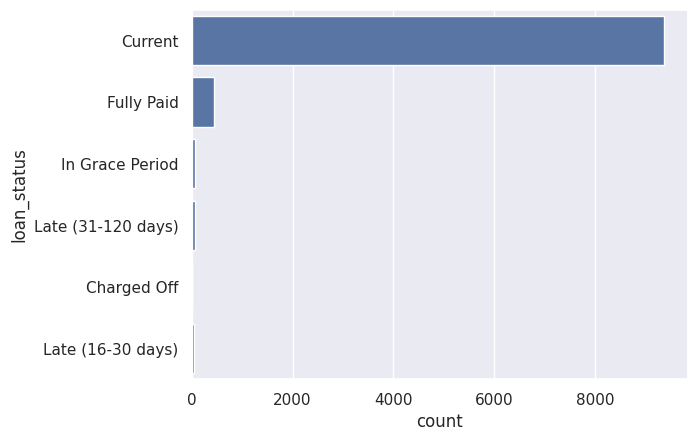

In [9]:
# Affichage sur un graphique
sns.countplot(y="loan_status", data=data2 , orient="V")

In [10]:
# Création de la variable cible
data2["Default"]=np.where(data2.loc[:, "loan_status"].isin(["Charged Off","Late(31-120)","Default","Non Conforme"]), 1,0 )

In [11]:
data2.drop(columns=["loan_status"], inplace=True)

In [12]:
data2.Default.value_counts(normalize=True)

,proportion
Default,
0,0.9993
1,0.0007


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   delinq_2y                         10000 non-null  int64  
 8   months_since_last_delinq          4342 non-null   float64
 9   earliest_credit_line              10000 non-null  int64  
 10  inquiries_last_12m                10000 non-null  int64  
 11  total_credit_lines                10000 non-null  int64  
 12  open_

In [14]:
cat_var=["state","homeownership","verified_income","loan_purpose","application_type","grade"]

In [15]:
data2.groupby("Default")["current_accounts_delinq"].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,9993.0,0.0001,0.010004,0.0,0.0,0.0,0.0,1.0
1,7.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


In [16]:
data2.groupby("Default")["delinq_2y"].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,9993.0,0.216151,0.683875,0.0,0.0,0.0,0.0,13.0
1,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
data2.groupby("Default")["num_accounts_120d_past_due"].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,9676.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data2=data2.drop(columns=(["num_accounts_120d_past_due","current_accounts_delinq"]))

In [19]:
data2.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'issue_month',

<ipython-input-20-5be4d723a0be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(2,1,1),sns.distplot(data2["loan_amount"])
<ipython-input-20-5be4d723a0be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(2,1,2),sns.distplot(data2["interest_rate"])


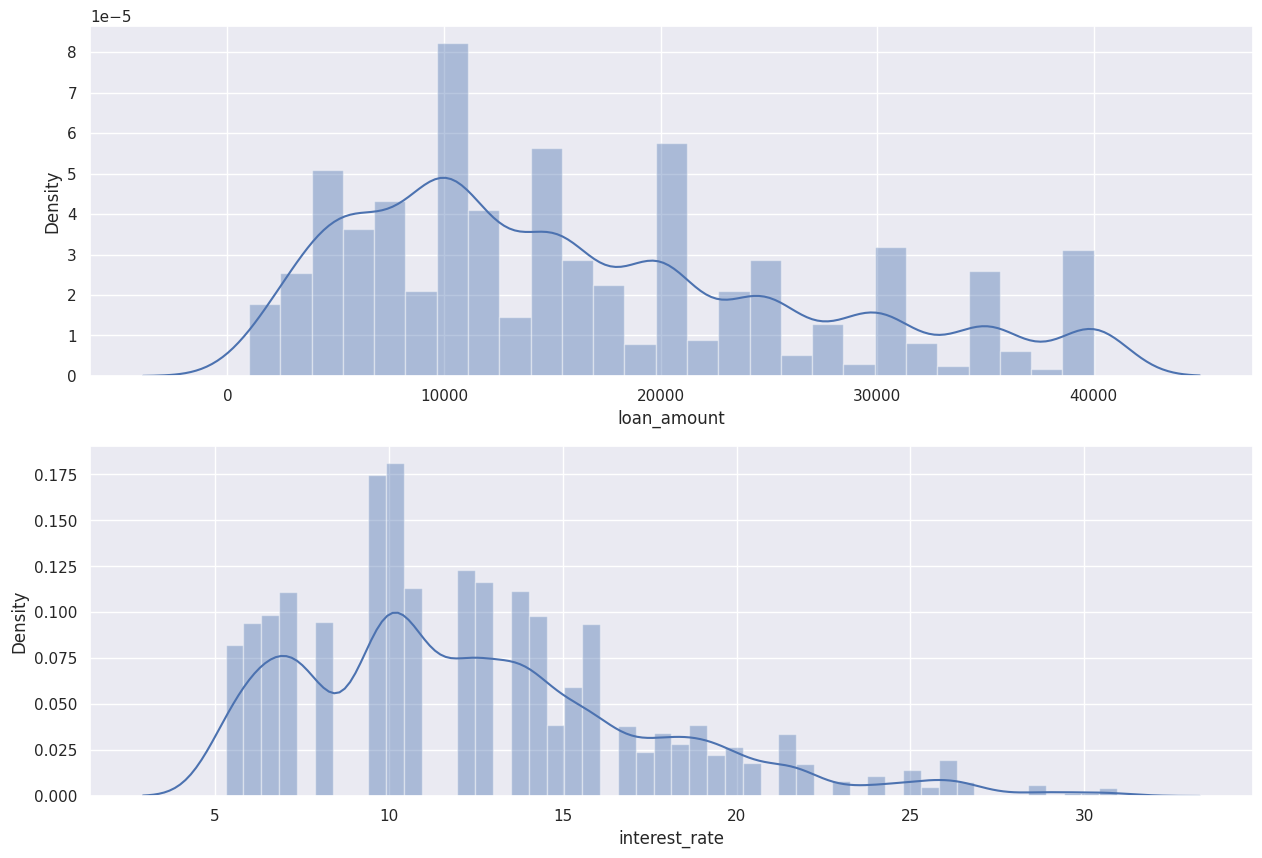

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1),sns.distplot(data2["loan_amount"])
plt.subplot(2,1,2),sns.distplot(data2["interest_rate"])
plt.show()

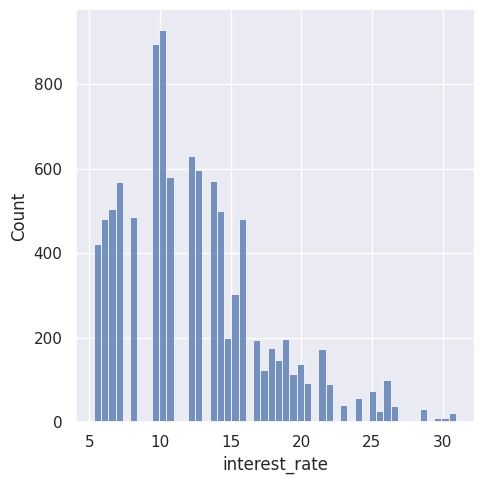

In [21]:
sns.displot(x=data2["interest_rate"])

<Axes: xlabel='loan_amount', ylabel='interest_rate'>

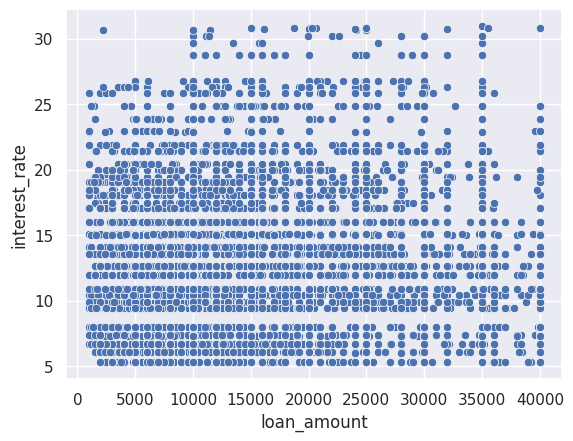

In [22]:
sns.scatterplot(data=data2, x="loan_amount", y="interest_rate")

<Axes: xlabel='loan_amount', ylabel='installment'>

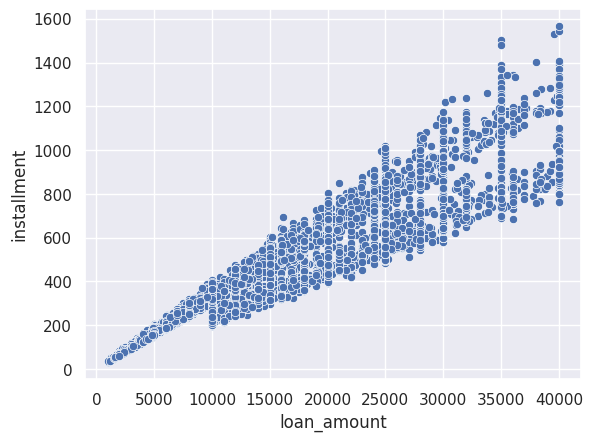

In [23]:
sns.scatterplot(data=data2, x="loan_amount", y="installment")

In [24]:
loan_purpose =data2["loan_purpose"].value_counts(dropna=False).to_frame().reset_index()
loan_purpose.columns=["objectif_du_pret", "Count"]

In [25]:
loan_purpose.head()

,objectif_du_pret,Count
0,debt_consolidation,5144
1,credit_card,2249
2,other,914
3,home_improvement,680
4,major_purchase,303


<Axes: xlabel='objectif_du_pret', ylabel='Count'>

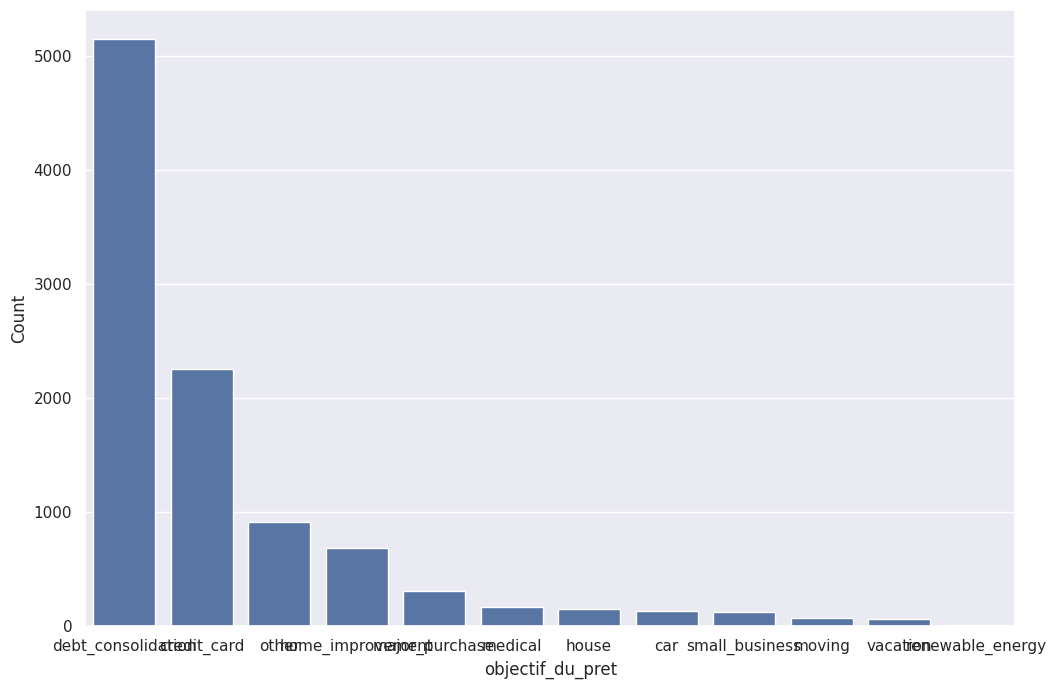

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_purpose, x="objectif_du_pret",  y="Count", orient="v")

<Axes: xlabel='Experience', ylabel='Count'>

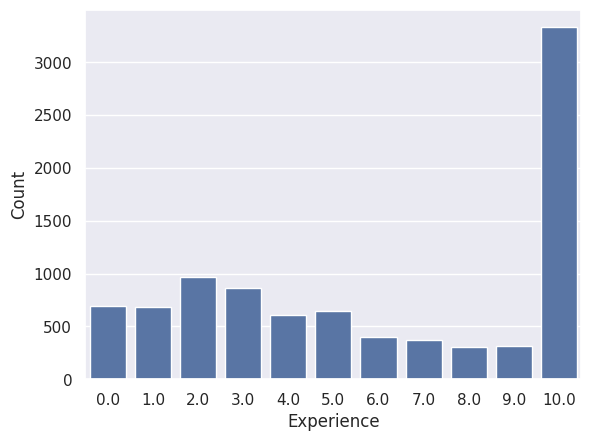

In [27]:
Experience =data2["emp_length"].value_counts(dropna=False).to_frame().reset_index()
Experience.columns=["Experience", "Count"]
sns.barplot(data=Experience, x="Experience",  y="Count", orient="v")

<Axes: xlabel='Default', ylabel='loan_amount'>

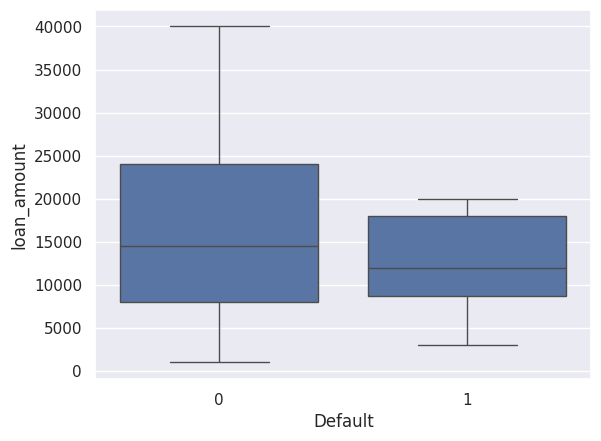

In [28]:
sns.boxplot(x= data2.Default, y= data2.loan_amount)

<Axes: xlabel='loan_amount', ylabel='Count'>

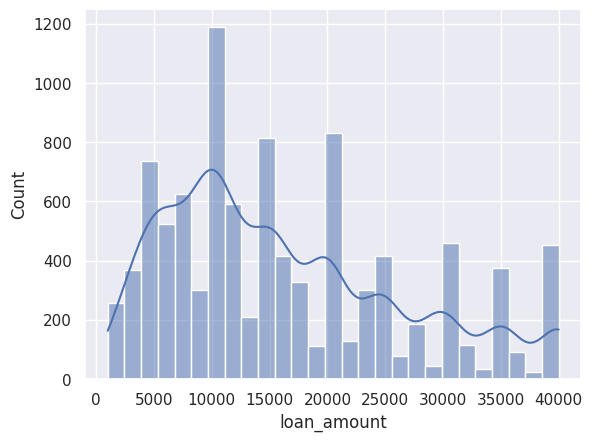

In [29]:
sns.histplot(data2.loan_amount, kde=True)

<Axes: xlabel='interest_rate', ylabel='Count'>

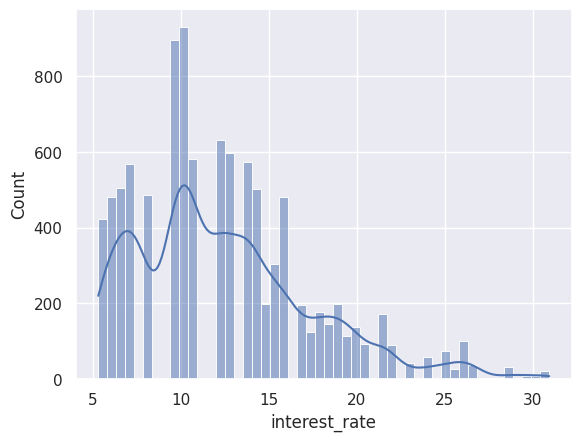

In [30]:
sns.histplot(data2.interest_rate, kde=True)

<Axes: xlabel='loan_amount', ylabel='Density'>

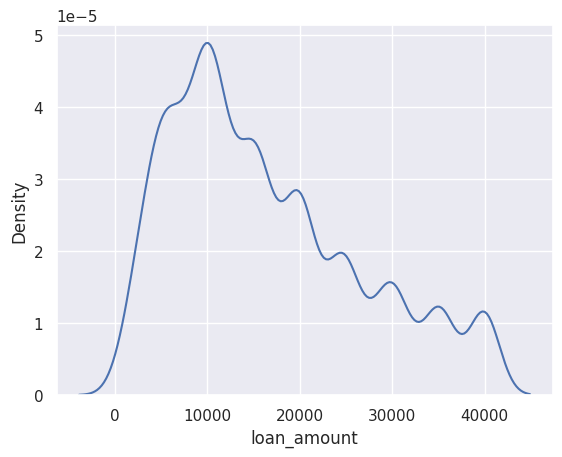

In [31]:
sns.kdeplot(data2["loan_amount"])

In [32]:
import sweetviz as sv

In [33]:
#!pip uninstall numpy
#!pip install numpy==1.24.0

In [34]:
rapport = sv.analyze([data2, "loan_data"], target_feat="Default")
rapport.show_html("rapport_d_analyse.html")

                                             |          | [  0%]   00:00 -> (? left)

Report rapport_d_analyse.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
